In [1]:
#Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as shc

In [2]:
pubg =pd.read_csv(r"train_V2.csv(pubg)")
pubg.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [3]:
pubg.describe

<bound method NDFrame.describe of                      Id         groupId         matchId  assists  boosts  \
0        7f96b2f878858a  4d4b580de459be  a10357fd1a4a91        0       0   
1        eef90569b9d03c  684d5656442f9e  aeb375fc57110c        0       0   
2        1eaf90ac73de72  6a4a42c3245a74  110163d8bb94ae        1       0   
3        4616d365dd2853  a930a9c79cd721  f1f1f4ef412d7e        0       0   
4        315c96c26c9aac  de04010b3458dd  6dc8ff871e21e6        0       0   
...                 ...             ...             ...      ...     ...   
4446961  afff7f652dbc10  d238e426f50de7  18492834ce5635        0       0   
4446962  f4197cf374e6c0  408cdb5c46b2ac  ee854b837376d9        0       1   
4446963  e1948b1295c88a  e26ac84bdf7cef  6d0cd12784f1ab        0       0   
4446964  cc032cdd73b7ac  c2223f35411394  c9c701d0ad758a        0       4   
4446965  0d8e7ed728b6fd  8c74f72fedf5ff  62a16aabcc095c        0       2   

         damageDealt  DBNOs  headshotKills  heals  ki

In [4]:
pubg.shape

(4446966, 29)

In [5]:
pubg_ = pubg.loc[0:1000,['longestKill','matchDuration','rankPoints','walkDistance']]
pubg_

,longestKill,matchDuration,rankPoints,walkDistance
0,0.000,1306,-1,244.80
1,0.000,1777,1484,1434.00
2,0.000,1318,1491,161.80
3,0.000,1436,1408,202.70
4,58.530,1424,1560,49.75
...,...,...,...,...
996,49.410,1377,1452,2660.00
997,5.274,1861,1482,1077.00
998,0.000,1430,-1,2445.00
999,0.000,1383,1500,588.20


In [7]:
#Apply standardscaler for reduce highly fluctuated data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(pubg_)

array([[-0.46108918, -1.02980361, -1.22443647, -0.77389377],
       [-0.46108918,  0.82753257,  0.79694949,  0.25478785],
       [-0.46108918, -0.98248294,  0.8064779 , -0.84569042],
       ...,
       [-0.46108918, -0.54082338, -1.22443647,  1.12932292],
       [-0.46108918, -0.72616266,  0.81872873, -0.47684595],
       [-0.38090179,  1.26524875,  0.81872873,  0.09908427]])

In [8]:
#pca for less variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
pca.fit(pubg_)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [9]:
x_pca = pca.transform(pubg_)

In [10]:
x_pca.shape

(1001, 3)

In [11]:
#clusterding the data 
from sklearn.cluster import KMeans
km = KMeans(n_clusters=5)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [12]:
y_pred = km.fit_predict(pubg_[['longestKill','matchDuration','rankPoints','walkDistance']])
y_pred

array([0, 2, 3, ..., 4, 3, 2])

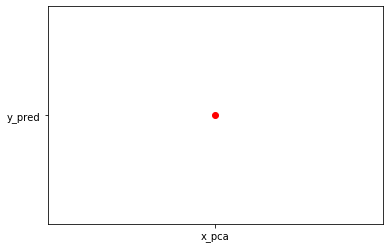

In [14]:
#plotting the data
plt.scatter(x='x_pca',y='y_pred', c= 'r')
plt.show()